# Comments

## Part 2

We can see that variable importances are not the same across the models. As a general pattern, feature **cp** is the most important, however for RidgeClassifier it's very similar to **cp**. Interestingly, importances differ also between models from the same class, but with different hyperparameters (number of estimators in the forest model). In general, different variable importances mean that models attend to different parts of the dataset. This result is understandable, because particular models can focus on various patterns in the dataset. 


In [58]:
plot_p_var_imp(grad_explainer)

In [59]:
plot_p_var_imp(forest_explainer)

In [60]:
plot_p_var_imp(forest_2_explainer)

In [61]:
plot_p_var_imp(lr_explainer)

## Part 3A

Even though **cp** is still the most important feature in this comparison, we can see significant differences to the previous approach. We can observe that the feature **thalachh** is now on the second place (more important than **caa**, while previously it was in the group of less important features.

In [62]:
plot_var_imp(forest_model)

## Part 3B

Again, we can see that there are some differences between the current calculation and both of the previous ones. For example, the **thall** feature seems to be more important in the current approach. The differences show us that calculating feature importances is generally a complex problem. One of the difficulties is that we can measure impact of a feature on the result in different ways. Even though intuitively we can understand the idea of feature importances, it's crucial to make sure that the chosen method of explaining corresponds with what are we interested in.

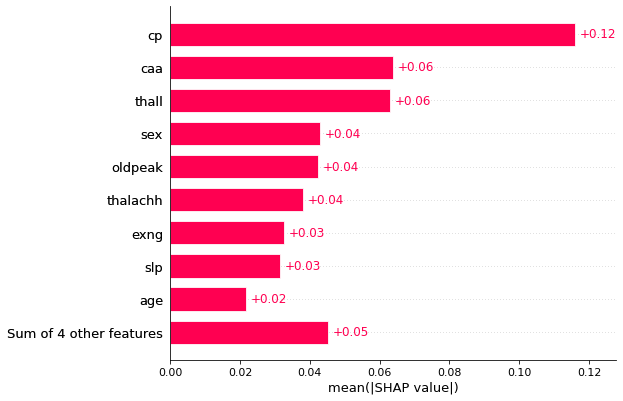

In [63]:
plot_shap_var_imp(forest_model)

# Appendix

In [57]:
import numpy as np
import pandas as pd
import plotly.express as px
import sklearn
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
import dalex
import shap

df = pd.read_csv("heart.csv")
X = df.iloc[:, :13]
y = df.iloc[:, 13]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

grad_model = GradientBoostingClassifier().fit(X_train, y_train)
forest_model = RandomForestClassifier().fit(X_train, y_train)
forest_model_2 = RandomForestClassifier(n_estimators=20).fit(X_train, y_train)
lr_model = RidgeClassifier().fit(X_train, y_train)

grad_explainer = dalex.Explainer(grad_model, X_test, y_test)
forest_explainer = dalex.Explainer(forest_model, X_test, y_test)
forest_2_explainer = dalex.Explainer(forest_model_2, X_test, y_test)
lr_explainer = dalex.Explainer(lr_model, X_test, y_test)

explainers = [grad_explainer, forest_explainer, forest_2_explainer, lr_explainer]

def plot_p_var_imp(expl):
  parts = expl.model_parts(random_state=0)
  fig = parts.plot(show=False).update_layout(autosize=False, width=600, height=450)
  fig.show()

col_names = X_train.columns.values

def plot_var_imp(model):
  imp = model.feature_importances_
  plot_df = pd.DataFrame({'feature': col_names, 'importance': imp})
  plot_df = plot_df.sort_values(by='importance')
  fig = px.bar(plot_df, y='feature', x='importance')
  fig.show()

def plot_shap_var_imp(model):
    shap_explainer = shap.explainers.Tree(model, X_test, model_output='probability')
    shap_explainer = shap_explainer(X_test)[..., 1]
    shap.plots.bar(shap_explainer)

Preparation of a new explainer is initiated

  -> data              : 100 rows 13 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 100 values
  -> model_class       : sklearn.ensemble._gb.GradientBoostingClassifier (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_proba_default at 0x7f01e75e3a70> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.00811, mean = 0.631, max = 0.995
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.96, mean = -0.0213, max = 0.91
  -> model_info        : package sklearn

A new explainer has been created!
Preparation of a new explainer is initiated

  -> data              : 100 rows 13 cols
  -> target variable   : Par

X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RidgeClassifier was fitted with feature names
